<a href="https://colab.research.google.com/github/Albert-Present/D/blob/main/Copy_of_W3Drones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 4.3MB/s 
     |████████████████████████████████| 204kB 8.4MB/s 
     |████████████████████████████████| 1.2MB 11.4MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
Mounted at /content/gdrive


In [4]:
# from pathlib import Path
from fastai.vision.all import *

In [ ]:
#Select True of False according to your choice
SAVE_ON_GDRIVE = True

In [ ]:
if SAVE_ON_GDRIVE:
    root_dir = "/content/gdrive/My Drive/fastai/"
else:
    root_dir = "/content/"

base_dir = root_dir + 'unpackai/'

In [ ]:
destination = Path(base_dir + '/drones')
os.makedirs(destination, exist_ok=True)
for t in ['nc', 'c']:
    path2class = untar_data(f"https://github.com/vtecftwy/unpackai-image-set/blob/main/{t}.zip?raw=true", 
                            fname=f"{t}.zip", 
                            dest=destination)
    assert path2class.is_dir(), f"problem downloading {t}"

path = destination

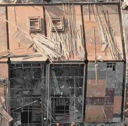

In [ ]:
# make a list of all images of grizzlies
list_c = [f for f in (path / 'c').iterdir() if f.is_file()]
list_c

# pick one and show it
picked_image = 0

im = Image.open(list_c[picked_image])
im.to_thumb(128,128)

In [ ]:
drones = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = drones.dataloaders(path)

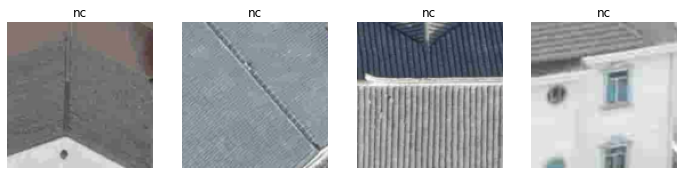

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

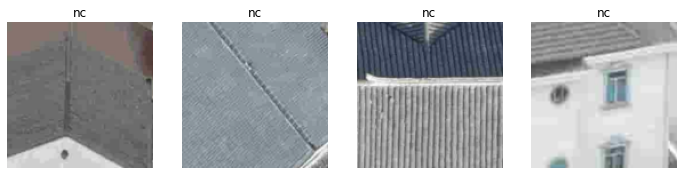

In [ ]:
drones = drones.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = drones.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

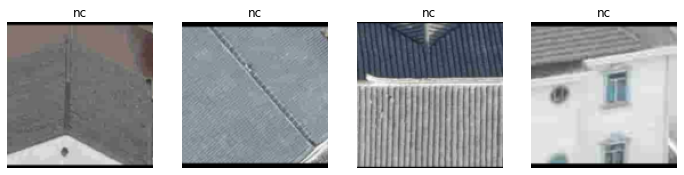

In [ ]:
drones = drones.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = drones.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

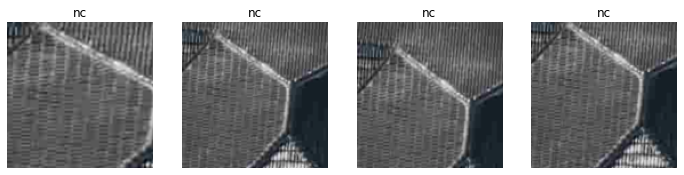

In [ ]:
drones = drones.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = drones.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

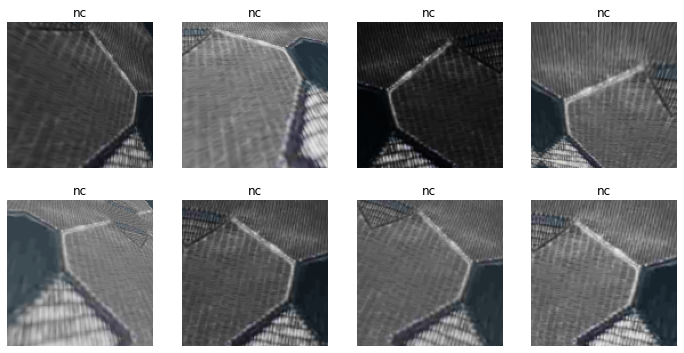

In [ ]:
drones = drones.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = drones.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:
drones = drones.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = drones.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.462407,2.075241,0.512820,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.740350,1.339939,0.384615,00:01
1,0.490192,0.815557,0.282051,00:01
2,0.396225,0.415820,0.179487,00:01
3,0.309401,0.292549,0.076923,00:01


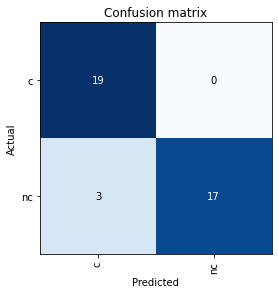

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

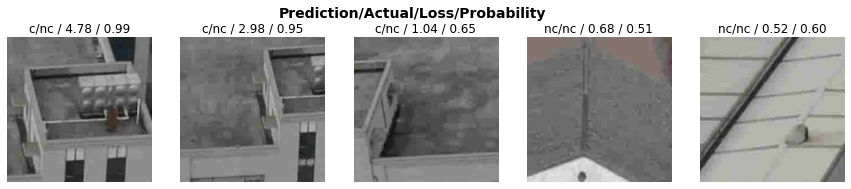

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner
VBox(children=(Dropdown(options=('nc', 'c'), value='c'), Dropdown(options=('Train', 'Val…

SyntaxError: ignored

In [ ]:
#hide
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)
